 # <span style = 'color : Green' > Telecom Churn Case Study

##### By : Debasish Deaty

##### Date : 02nd Jan 2024



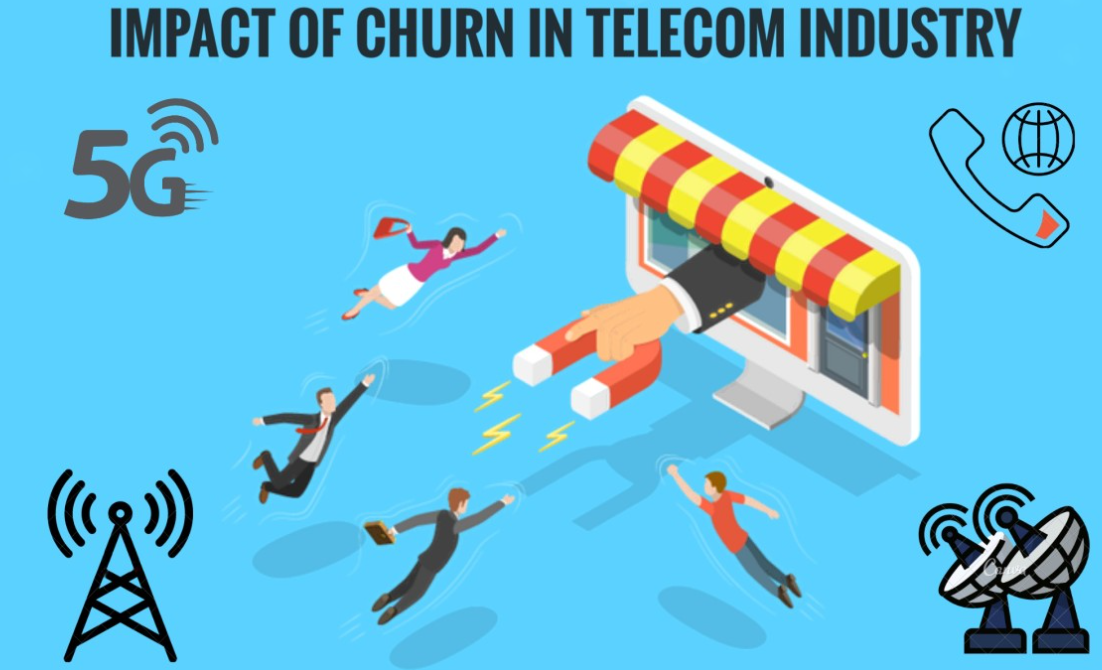


## Problem Statement
In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business
goal. To reduce customer churn, telecom companies need to predict which customers are at high risk of churn. In this project, you will analyze customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn.

In this competition, your goal is to build a machine learning model that is able to predict churning customers based on the features provided for their usage.



## Objectives
Objectives
The main goal of the case study is to build ML models to predict churn. The predictive model that you’re going to build will the following purposes:

- It will be used to predict whether a high-value customer will churn or not, in near future (i.e. churn phase). By knowing this, the company can take action steps such as providing special plans, discounts on recharge etc.

- It will be used to identify important variables that are strong predictors of churn. These variables may also indicate why customers choose to switch to other networks.

- Even though overall accuracy will be your primary evaluation metric, you should also mention other metrics like precision, recall, etc. for the different models that can be used for evaluation purposes based on different business objectives. For example, in this problem statement, one business goal can be to build an ML model that identifies customers who'll definitely churn with more accuracy as compared to the ones who'll not churn. Make sure you mention which metric can be used in such scenarios.

- Recommend strategies to manage customer churn based on your observations.


## Understanding and Defining Churn

There are two main models of payment in the telecom industry - postpaid (customers pay a monthly/annual bill after using the services) and prepaid (customers pay/recharge with a certain amount in advance and then use the services).

In the postpaid model, when customers want to switch to another operator, they usually inform the existing operator to terminate the services, and we directly know that this is an instance of churn.

However, in the prepaid model, customers who want to switch to another network can simply stop using the services without any notice, and it is hard to know whether someone has actually churned or is simply not using the services temporarily (e.g. someone may be on a trip abroad for a month or two and then intend to resume using the services again).

Thus, churn prediction is usually more critical (and non-trivial) for prepaid customers, and the term ‘churn’ should be defined carefully.  Also, prepaid is the most common model in India and southeast Asia, while postpaid is more common in Europe in North America.

This project is based on the Indian and Southeast Asian market.


## Definitions of Churn 

There are various ways to define churn, such as:

**Revenue-based churn:** Customers who have not utilised any revenue-generating facilities such as mobile internet, outgoing calls, SMS etc. over a given period of time. One could also use aggregate metrics such as ‘customers who have generated less than INR 4 per month in total/average/median revenue’.

The main shortcoming of this definition is that there are customers who only receive calls/SMSes from their wage-earning counterparts, i.e. they don’t generate revenue but use the services. For example, many users in rural areas only receive calls from their wage-earning siblings in urban areas.

**Usage-based churn:** Customers who have not done any usage, either incoming or outgoing - in terms of calls, internet etc. over a period of time.

A potential shortcoming of this definition is that when the customer has stopped using the services for a while, it may be too late to take any corrective actions to retain them. For e.g., if we define churn based on a ‘two-months zero usage’ period, predicting churn could be useless since by that time the customer would have already switched to another operator.

In this project, we will use the **usage-based** definition to define churn.


## High-value Churn

In the Indian and the southeast Asian market, approximately 80% of revenue comes from the top 20% customers (called high-value customers). Thus, if we can reduce churn of the high-value customers, we will be able to reduce significant revenue leakage.

In this project, we will define high-value customers based on a certain metric (mentioned later below) and predict churn only on high-value customers.


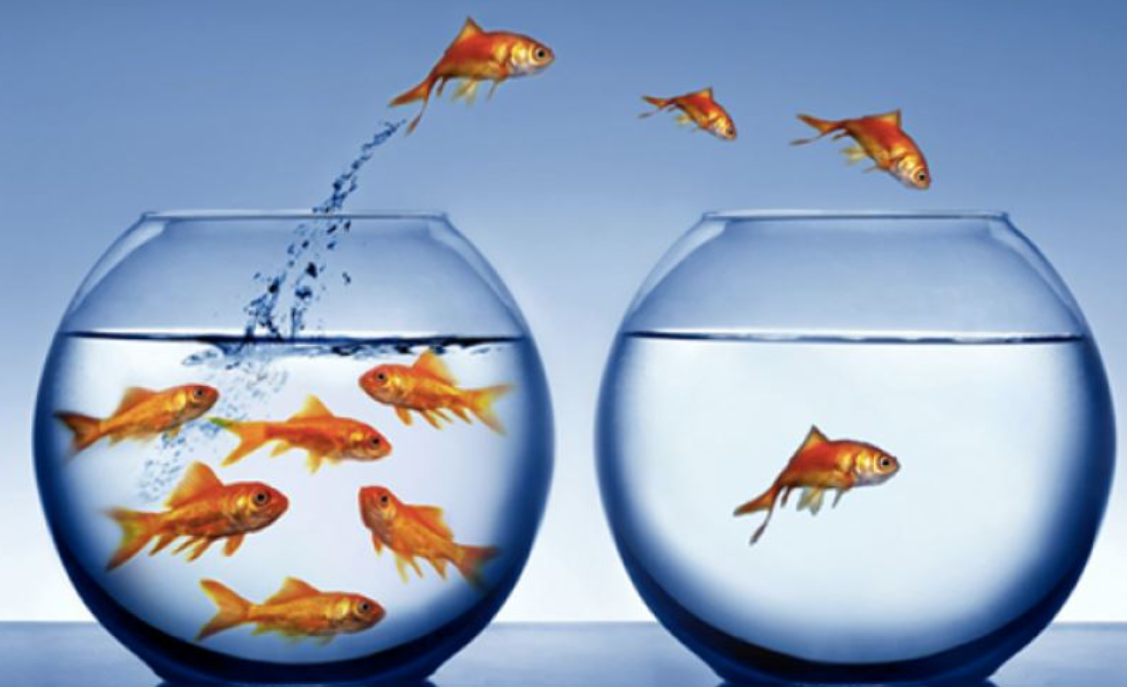


## Understanding Customer Behaviour During Churn

Customers usually do not decide to switch to another competitor instantly, but rather over a period of time (this is especially applicable to high-value customers). In churn prediction, we assume that there are three phases of customer lifecycle :

1. **The ‘good’ phase:** In this phase, the customer is happy with the service and behaves as usual.

2. **The ‘action’ phase:** The customer experience starts to sore in this phase, for e.g. he/she gets a compelling offer from a  competitor, faces unjust charges, becomes unhappy with service quality etc. In this phase, the customer usually shows different behaviour than the ‘good’ months. Also, it is crucial to identify high-churn-risk customers in this phase, since some corrective actions can be taken at this point (such as matching the competitor’s offer/improving the service quality etc.)

3. **The ‘churn’ phase:** In this phase, the customer is said to have churned. We define churn based on this phase. Also, it is important to note that at the time of prediction (i.e. the action months), this data is not available to us for prediction. Thus, after tagging churn as 1/0 based on this phase, we discard all data corresponding to this phase.

In this case, since we are working over a four-month window, the first two months are the ‘good’ phase, the third month is the ‘action’ phase, while the fourth month is the ‘churn’ phase.


 # <span style = 'color : Green' > Importing Libraries

In [1]:
# Importing Libraries
import pandas as pd 
import numpy as np 

import seaborn as sns 
import matplotlib.pyplot as plt 
import plotly.express as px 

from sklearn.model_selection import train_test_split

from sklearn.decomposition import PCA

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge

from sklearn.pipeline import Pipeline

from imblearn.combine import SMOTETomek

from skopt import BayesSearchCV
from xgboost import XGBClassifier,XGBRFClassifier

import lightgbm as lgb

from sklearn.preprocessing import MinMaxScaler

import scipy.stats as stats

from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,precision_recall_curve,PrecisionRecallDisplay,roc_auc_score,roc_curve
import optuna

import warnings
warnings.filterwarnings('ignore')

## Removing display limit of dataframe

In [2]:
#Removing display limit of dataframe (optional cell to run)
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

# Setting style for seaonrn
sns.color_palette("seismic", 50)
sns.set_style("whitegrid", {'axes.grid' : False})

# <span style = 'color : Green' > Importing train & test dataset

In [3]:
# Importing train dataset and displaying first 5 rows
tel_churn=pd.read_csv('train.csv')
tel_churn.head()

# Importing test dataset and displaying first 5 rows
tel_churn_test=pd.read_csv('test.csv')
tel_churn_test.head()

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0  69999        109             0.0             0.0             0.0   
1  70000        109             0.0             0.0             0.0   
2  70001        109             0.0             0.0             0.0   
3  70002        109             0.0             0.0             0.0   
4  70003        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8   arpu_6  \
0            6/30/2014            7/31/2014            8/31/2014   91.882   
1            6/30/2014            7/31/2014            8/31/2014  414.168   
2            6/30/2014            7/31/2014            8/31/2014  329.844   
3            6/30/2014            7/31/2014            8/31/2014   43.550   
4            6/30/2014            7/31/2014            8/31/2014  306.854   

    arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
0   65.330   64.445        31.78        20.23        23.11         60.16   
1  515.568  360.868        75.51        41.21        19.84        474.34   
2  434.884  746.239         7.54         7.86         8.40         16.98   
3  171.390   24.400         5.31         2.16         0.00         40.04   
4  406.289  413.329       450.93       609.03       700.68         60.94   

   offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0         32.16         34.83           0.00           0.00           0.00   
1        621.84        394.94           0.00           0.00           0.00   
2         45.81         45.04          22.81         103.38          26.08   
3        205.01         24.01           0.00           0.00           0.00   
4         23.84         74.16           0.00           0.00           0.00   

   roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
0           0.00           0.00           0.00             24.88   
1           0.00           0.00           0.00             75.51   
2          24.53          53.68          54.44              0.00   
3           0.00           0.00           0.00              5.31   
4           0.00           0.00           0.00              0.45   

   loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
0             20.23             21.06             18.13             10.89   
1             41.21             19.84            473.61            598.08   
2              0.00              0.00              0.00              0.00   
3              0.00              0.00              2.94             98.61   
4              0.78             14.56              2.39              2.66   

   loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
0              8.36              0.00             13.58              0.00   
1            377.26              0.73              0.00              0.00   
2              0.00              0.00              0.00              0.00   
3             20.51              0.00              0.00              2.35   
4             10.94              0.00              0.00              0.00   

   loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
0               0.0              0.00              0.03         43.01   
1               0.0              0.00              0.00        549.86   
2               0.0              0.00              0.00          0.00   
3               0.0              6.18              0.00          8.26   
4               0.0              0.00              0.00          2.84   

   loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
0         44.71         29.43              6.90              0.00   
1        639.29        397.11              0.00              0.00   
2          0.00          0.00              0.00              0.00   
3         98.61         22.86              0.00              2.16   
4          3.44         25.51            450.48            608.24   

 

In [4]:
# Shape of dataset
tel_churn.shape

(69999, 172)

## Basic information about the data

In [5]:
# Information about dataset
tel_churn.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 172 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    id                        int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    arpu_6                    float64
 9    arpu_7                    float64
 10   arpu_8                    float64
 11   onnet_mou_6               float64
 12   onnet_mou_7               float64
 13   onnet_mou_8               float64
 14   offnet_mou_6              float64
 15   offnet_mou_7              float64
 16   offnet_mou_8              float64
 17   roam_ic_mou_6             float64
 18   roam_ic_mou_7             float64
 19   roam_ic_mou_8             float64
 20   roam

In [6]:
#Basic information about the data
## Number of rows and columns
print('Number of Columns:',tel_churn.shape[1])
print('Number of Rows:',tel_churn.shape[0])
## Number of missing values
print('Number of missing values:',tel_churn.isnull().sum().sum())
## Number of unique values
print('Number of unique values:',tel_churn.nunique().sum())
## Number of duplicates
print('Number of duplicates:',tel_churn.duplicated().sum())

Number of Columns: 172
Number of Rows: 69999
Number of missing values: 1835086
Number of unique values: 1375105
Number of duplicates: 0


In [7]:
# Dataset Distribution
tel_churn.describe()

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count  69999.000000    69999.0         69297.0         69297.0   
mean   34999.000000      109.0             0.0             0.0   
std    20207.115084        0.0             0.0             0.0   
min        0.000000      109.0             0.0             0.0   
25%    17499.500000      109.0             0.0             0.0   
50%    34999.000000      109.0             0.0             0.0   
75%    52498.500000      109.0             0.0             0.0   
max    69998.000000      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8   onnet_mou_6  \
count         69297.0  69999.000000  69999.000000  69999.000000  67231.000000   
mean              0.0    283.134365    278.185912    278.858826    133.153275   
std               0.0    334.213918    344.366927    351.924315    299.963093   
min               0.0  -2258.709000  -1289.715000   -945.808000      0.000000   
25%               0.0     93.581000     86.714000     84.095000      7.410000   
50%               0.0    197.484000    191.588000    192.234000     34.110000   
75%               0.0    370.791000    365.369500    369.909000    119.390000   
max               0.0  27731.088000  35145.834000  33543.624000   7376.710000   

        onnet_mou_7   onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
count  67312.000000  66296.000000  67231.000000  67312.000000  66296.000000   
mean     133.894438    132.978257    198.874771    197.153383    196.543577   
std      311.277193    311.896596    316.818355    322.482226    324.089234   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        6.675000      6.410000     34.860000     32.240000     31.575000   
50%       32.280000     32.100000     96.480000     91.885000     91.800000   
75%      115.837500    115.060000    232.990000    227.630000    229.345000   
max     8157.780000  10752.560000   8362.360000   7043.980000  14007.340000   

       roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  \
count   67231.000000   67312.000000   66296.000000   67231.000000   
mean        9.765435       7.014568       7.004892      14.186457   
std        57.374429      55.960985      53.408135      73.469261   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max      2850.980000    4155.830000    4169.810000    3775.110000   

       roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   67312.000000   66296.000000      67231.000000      67312.000000   
mean        9.842191       9.771783         46.904854         46.166503   
std        58.511894      64.618388        150.971758        154.739002   
min         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          1.660000          1.650000   
50%         0.000000       0.000000         11.910000         11.580000   
75%         0.000000       0.000000         40.740000         39.760000   
max      2812.040000    5337.040000       6431.330000       7400.660000   

       loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  \
count      66296.000000      67231.000000      67312.000000      66296.000000   
mean          45.686109         93.238231         90.799240         91.121447   
std          153.716880        162.046699        153.852597        152.997805   
min            0.000000          0.000000          0.000000          0.000000   
25%            1.610000          9.920000         10.090000          9.830000   
50%           11.740000         41.030000         40.170000         40.350000   
75%           39.895000        110.430000        107.540000        109.245000   
max        10752.560000       4696

In [8]:
# Checking Classes Distribution
tel_churn['churn_probability'].value_counts()/tel_churn.shape[0]*100

0    89.811283
1    10.188717
Name: churn_probability, dtype: float64

From describe() and info() we can see that data has large number of null values as well as outliers which needs to be handled. We will handle these issues in the next section.

# <span style = 'color : Green' > Cleaning the data

In [9]:
# Checking for missing value percentage
pd.DataFrame((tel_churn.isnull().sum()/len(tel_churn)*100).sort_values(ascending=False))

0
arpu_3g_6                 74.902499
count_rech_2g_6           74.902499
night_pck_user_6          74.902499
arpu_2g_6                 74.902499
date_of_last_rech_data_6  74.902499
...                             ...
last_day_rch_amt_8         0.000000
vol_2g_mb_6                0.000000
vol_2g_mb_7                0.000000
vol_2g_mb_8                0.000000
churn_probability          0.000000

[172 rows x 1 columns]

In [10]:
# Removing column with 30% or more null values as it will reduce the impact on analysis
tel_churn = tel_churn.loc[:,tel_churn.isnull().sum()/tel_churn.shape[0]*100<30]
# Shape of the dataframe after removing columns
tel_churn.shape

(69999, 142)

In [11]:
# Checking for missing value percentage
pd.DataFrame((tel_churn.isnull().sum()/len(tel_churn)*100).sort_values(ascending=False))

0
roam_og_mou_8      5.290076
og_others_8        5.290076
spl_og_mou_8       5.290076
loc_ic_t2t_mou_8   5.290076
loc_og_t2m_mou_8   5.290076
...                     ...
total_rech_amt_8   0.000000
max_rech_amt_6     0.000000
max_rech_amt_7     0.000000
max_rech_amt_8     0.000000
churn_probability  0.000000

[142 rows x 1 columns]

## Removing rows with missing values 

In [12]:
# Removing rows with missing values with more than 10 missing values
tel_churn.dropna(axis=0,inplace=True,thresh=tel_churn.shape[1]-10)
# Shape of the dataframe after removing rows
print(tel_churn.shape)

(63842, 142)


In [13]:
# List of columns with Date datatype
date_cols = [k for k in tel_churn.columns.to_list() if 'date' in k]
date_cols

['last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8']

In [14]:
# Converting Date columns to datetime datatype and extracting the days before last day
for i in date_cols:
    tel_churn[i] = pd.to_datetime(tel_churn[i])
    tel_churn[i] = tel_churn[i].dt.date
    tel_churn[i] = pd.to_datetime(tel_churn[i])
    tel_churn[i] = tel_churn[i].dt.daysinmonth - tel_churn[i].dt.day

# for test data set
for i in date_cols:
    tel_churn_test[i] = pd.to_datetime(tel_churn_test[i])
    tel_churn_test[i] = tel_churn_test[i].dt.date
    tel_churn_test[i] = pd.to_datetime(tel_churn_test[i])
    tel_churn_test[i] = tel_churn_test[i].dt.daysinmonth - tel_churn_test[i].dt.day

In [15]:
# Printing the date columns
tel_churn[date_cols].value_counts()

last_date_of_month_6  last_date_of_month_7  last_date_of_month_8  date_of_last_rech_6  date_of_last_rech_7  date_of_last_rech_8
0                     0                     0                     0.0                  0.0                  0.0                    1083
                                                                                                            1.0                     645
                                                                  1.0                  0.0                  0.0                     618
                                                                  0.0                  1.0                  0.0                     591
                                                                  1.0                  0.0                  1.0                     435
                                                                                                                                   ... 
                                                        

### Removing the columns with only one unique value among date columns

In [16]:
# Removing the columns with only one unique value among date columns
tel_churn.drop(columns=['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8'],inplace=True)
date_cols.remove('last_date_of_month_6')
date_cols.remove('last_date_of_month_7')
date_cols.remove('last_date_of_month_8')

# for test data set
tel_churn_test.drop(columns=['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8'],inplace=True)

### Removing duplicate ID

In [17]:
# Removing duplicate ID columns
tel_churn.drop(['circle_id'],axis=1,inplace=True)
# for test data set
tel_churn_test.drop(['circle_id'],axis=1,inplace=True)

### <span style = 'color : Green' > MSNO Matrix used to display a matrix-shaped heatmap of missing values in a dataset.

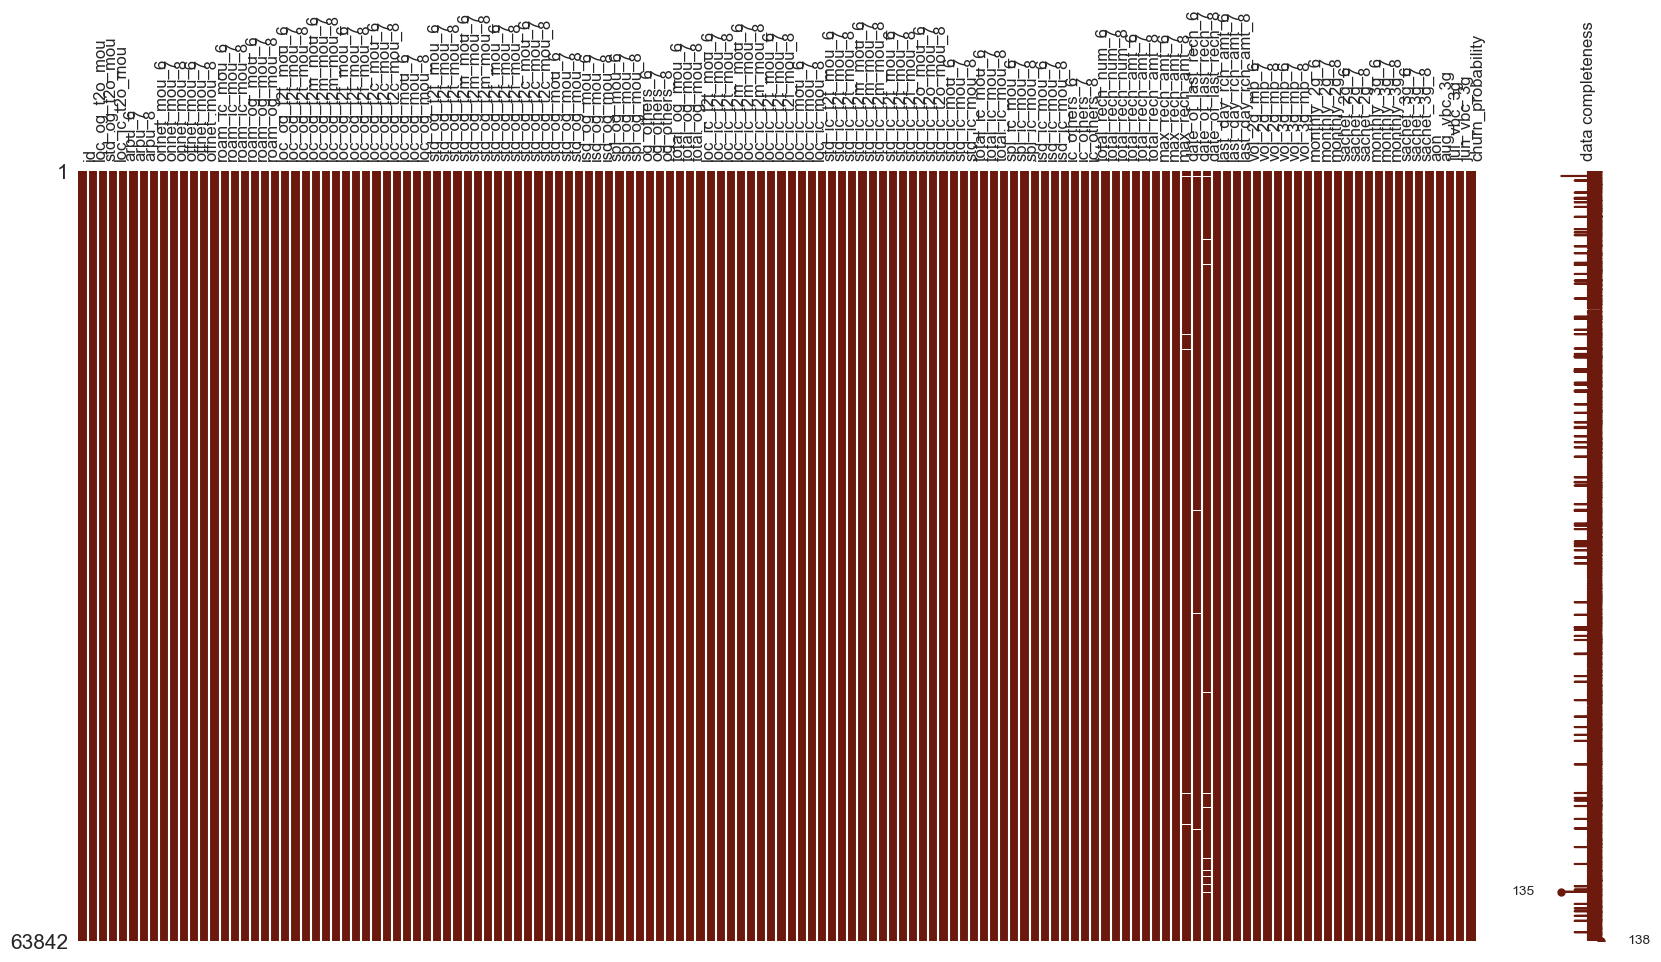

In [18]:
import missingno as msno
msno.matrix(tel_churn,figsize=(20,10),fontsize=12,color=(0.42, 0.1, 0.05),sparkline=True,labels=True,label_rotation=90)
plt.show()

As it is evident from the chart there is some missing values in the data. We will try to find the pattern and fill the missing values accordingly. We are using MICE technique to fill the missing values.

### <span style = 'color : Green' > Using MICE to impute missing values

In [19]:
# Using MICE to impute missing values
imp = IterativeImputer(estimator=BayesianRidge(),max_iter=10, random_state=0)
# Fitting the imputer for each index in date columns
for i in date_cols:
    tel_churn[i] = imp.fit_transform(tel_churn[i].values.reshape(-1,1))

All the missing values are filled and thus can proceed with the next step of data analysis. As all columns are numeric we can proceed with scatter charts to find the correlation between the columns. One last step to remove unwanted columns from the data which have only one value.

In [20]:
# Remove Columns with only one unique value
tel_churn = tel_churn.loc[:,tel_churn.nunique()!=1]
tel_churn.shape

(63842, 129)

# <span style = 'color : Green' > Deriving new features

In [21]:
# Average recharge amount for June and July
tel_churn['avg_rech_amt_6_7']=((tel_churn['total_rech_amt_6']+tel_churn['total_rech_amt_7'])/2)
# for test data set
tel_churn_test['avg_rech_amt_6_7']=((tel_churn_test['total_rech_amt_6']+tel_churn_test['total_rech_amt_7'])/2)

In [22]:
# Days user with company
tel_churn['days_stayed'] = tel_churn['date_of_last_rech_8'] - tel_churn['date_of_last_rech_6']
# for test data set
tel_churn_test['days_stayed'] = tel_churn_test['date_of_last_rech_8'] - tel_churn_test['date_of_last_rech_6']

In [23]:
# Average 3g usage for June and July
tel_churn['avg_3g_6_7']=((tel_churn['vol_3g_mb_6']+tel_churn['vol_3g_mb_7'])/2)
# for test data set
tel_churn_test['avg_3g_6_7']=((tel_churn_test['vol_3g_mb_6']+tel_churn_test['vol_3g_mb_7'])/2)

In [24]:
# Average 2g usage for June and July
tel_churn['avg_2g_6_7']=((tel_churn['vol_2g_mb_6']+tel_churn['vol_2g_mb_7'])/2)
# for test data set
tel_churn_test['avg_2g_6_7']=((tel_churn_test['vol_2g_mb_6']+tel_churn_test['vol_2g_mb_7'])/2)

In [25]:
# Avergae of 6th and 7th month total usage
tel_churn['avg_total_6_7']=((tel_churn['total_og_mou_6']+tel_churn['total_og_mou_7'])/2)
# for test data set
tel_churn_test['avg_total_6_7']=((tel_churn_test['total_og_mou_6']+tel_churn_test['total_og_mou_7'])/2)

In [26]:
# Avg. mou at action phase
# We are taking average because there are two months(7 and 8) in action phase
tel_churn['avg_mou_action'] = (tel_churn['total_og_mou_7'] + tel_churn['total_og_mou_8'] + tel_churn['total_ic_mou_7'] + tel_churn['total_ic_mou_8'])/2
# for test data set
tel_churn_test['avg_mou_action'] = (tel_churn_test['total_og_mou_7'] + tel_churn_test['total_og_mou_8'] + tel_churn_test['total_ic_mou_7'] + tel_churn_test['total_ic_mou_8'])/2

In [27]:
# ARUP in action phase
tel_churn['avg_arpu_action'] = (tel_churn['arpu_7'] + tel_churn['arpu_8'])/2
# Difference of good and action phase ARPU
tel_churn['diff_arpu'] = tel_churn['avg_arpu_action'] - tel_churn['arpu_6']
# Checking whether the arpu has decreased on the action month
tel_churn['decrease_arpu_action'] = np.where(tel_churn['diff_arpu'] < 0, 1, 0)

# ARUP in action phase
tel_churn_test['avg_arpu_action'] = (tel_churn_test['arpu_7'] + tel_churn_test['arpu_8'])/2
# Difference of good and action phase ARPU
tel_churn_test['diff_arpu'] = tel_churn_test['avg_arpu_action'] - tel_churn_test['arpu_6']
# Checking whether the arpu has decreased on the action month
tel_churn_test['decrease_arpu_action'] = np.where(tel_churn_test['diff_arpu'] < 0, 1, 0)

## <span style = 'color : Green' > Filtering High-Value Customers

In [28]:
# Filtering the customers based on average recharge amount
perc_6_7=tel_churn['avg_rech_amt_6_7'].quantile(0.70)
tel_churn=tel_churn[tel_churn['avg_rech_amt_6_7']>=perc_6_7]
tel_churn.shape

(19180, 138)

In [29]:
# Column list with id and target variable
col_list_bar = tel_churn.columns.to_list()
col_list_bar.remove('churn_probability')
col_list_bar.remove('id')

## <span style = 'color : Green' > Outlier Treatment

In [30]:
# Removing outlier using z-score method 
z = np.abs(stats.zscore(tel_churn[col_list_bar]))
tel_churn = tel_churn[(z < 5).all(axis=1)]
tel_churn.shape

(14259, 138)

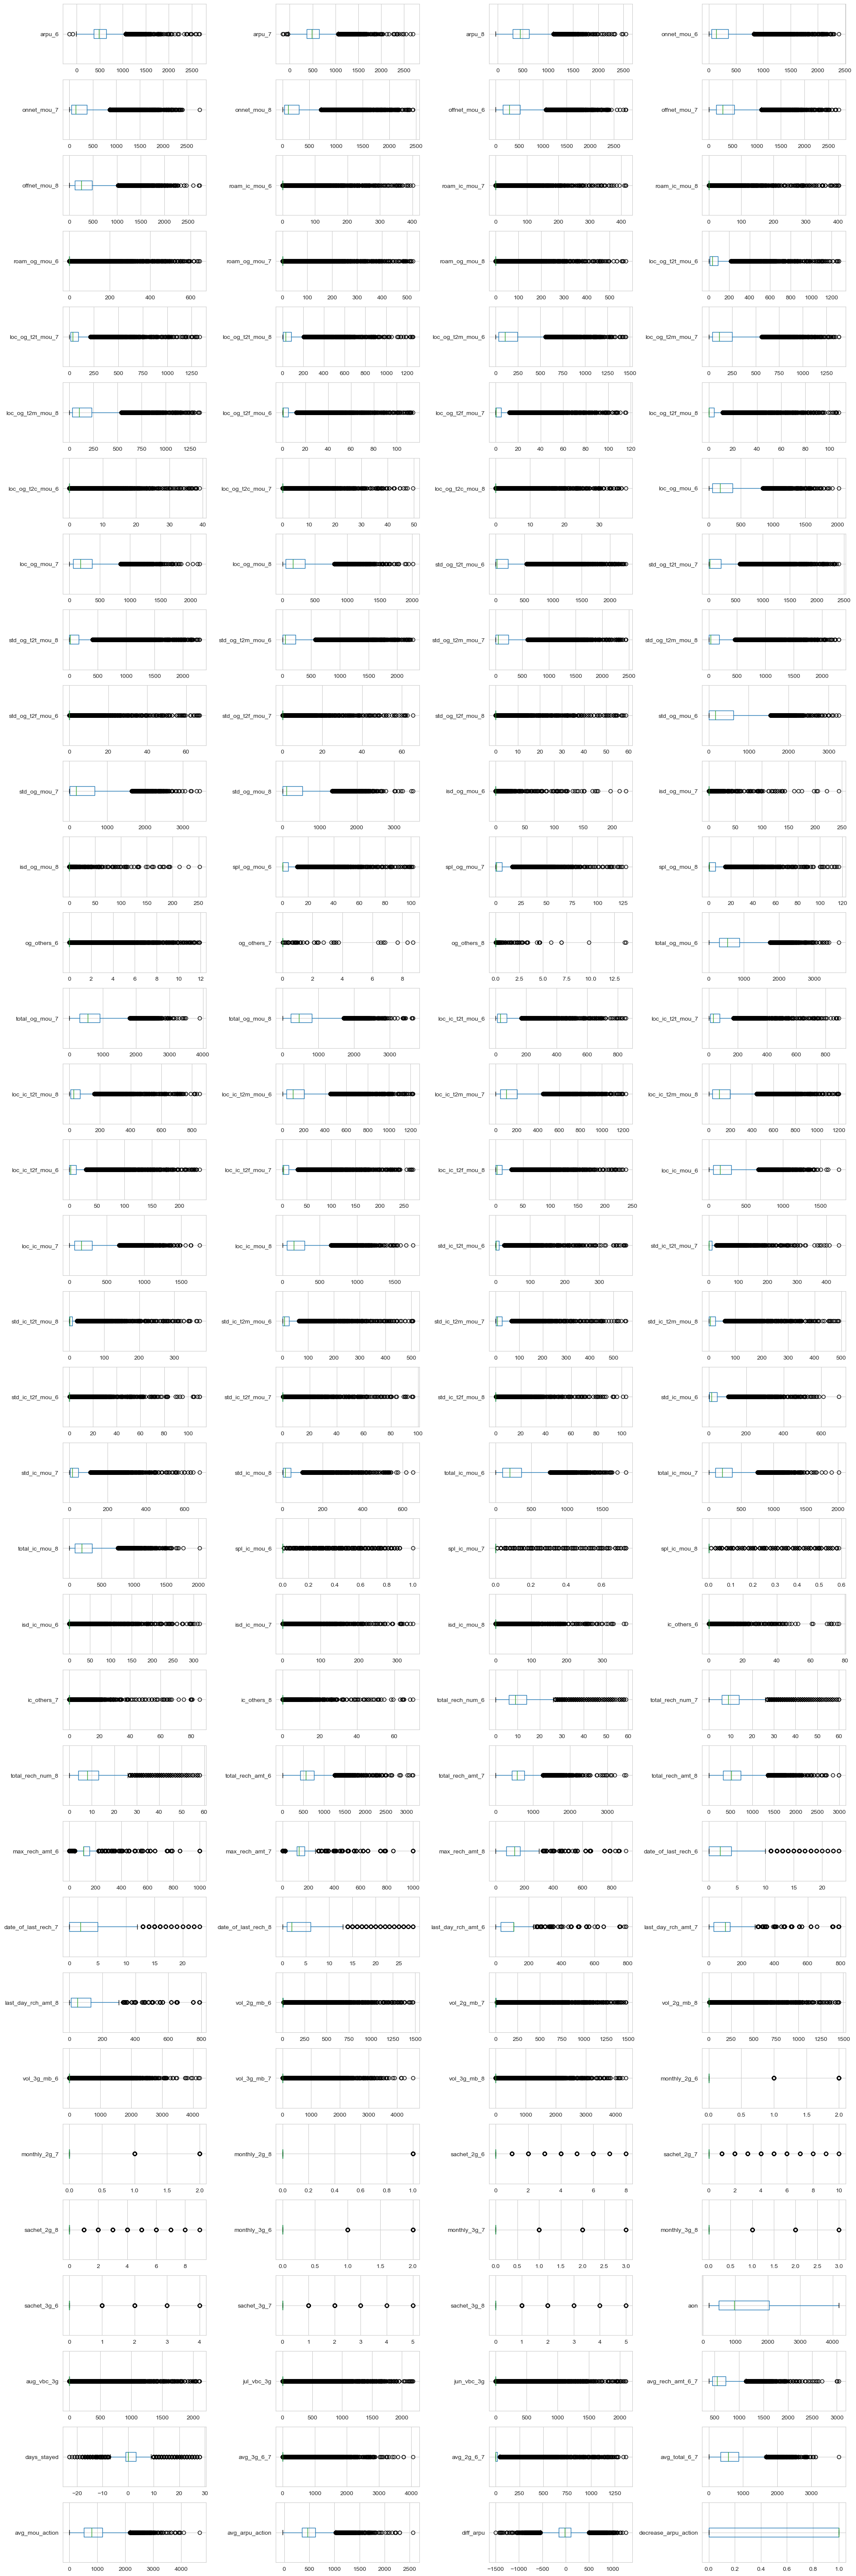

In [31]:
# Checking for outliers using boxplot in a 34 by 4 grid
fig, ax = plt.subplots(34, 4, figsize=(20, 60))
for variable, subplot in zip(col_list_bar, ax.flatten()):
    tel_churn.boxplot(column=variable, ax=subplot, vert=False)
plt.tight_layout()
plt.show()

As the outluers are present in large number and IQR method will result in loss of data we used z score method. As we are using a model to predict the churn we can use a model which is robust to outliers.

In [32]:
# Creating copy of dataframe for Predictive model
tel_churn_pred = tel_churn.copy()

## <span style = 'color : Green' > Uni-variate Analysis

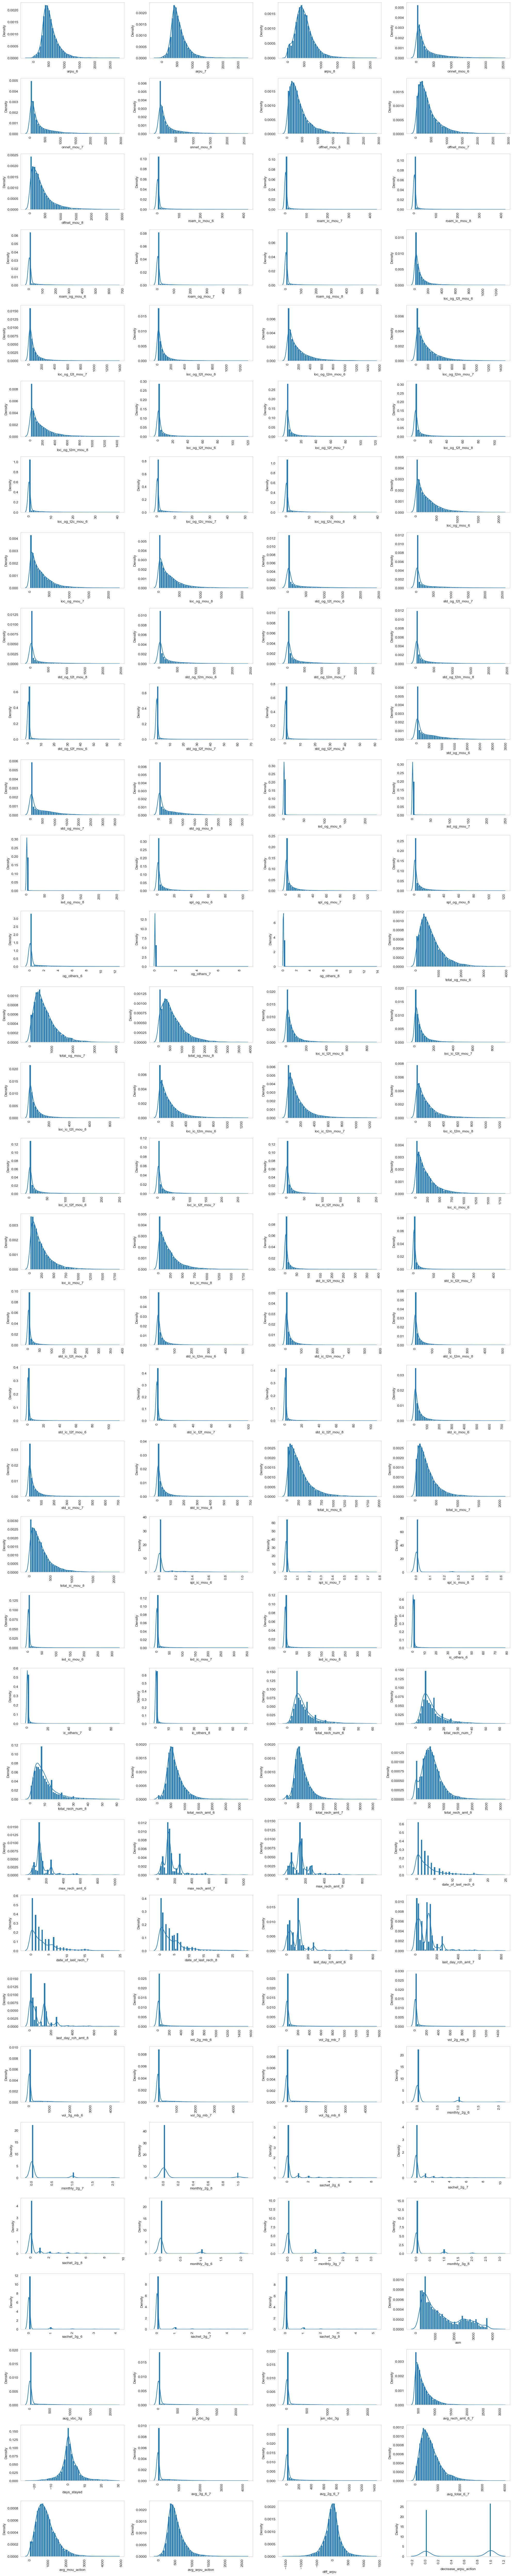

In [33]:
# Checking for distribution using distplot in a 34 by 4 grid
fig, ax = plt.subplots(34, 4, figsize=(20, 100))
for variable, subplot in zip(col_list_bar, ax.flatten()):
    sns.distplot(tel_churn[variable], ax=subplot,kde=True, bins=50, hist_kws={'alpha': 1})
    for label in subplot.get_xticklabels():
        label.set_rotation(90)
plt.tight_layout()
plt.show()

## <span style = 'color : Green' > Bi-variate Analysis

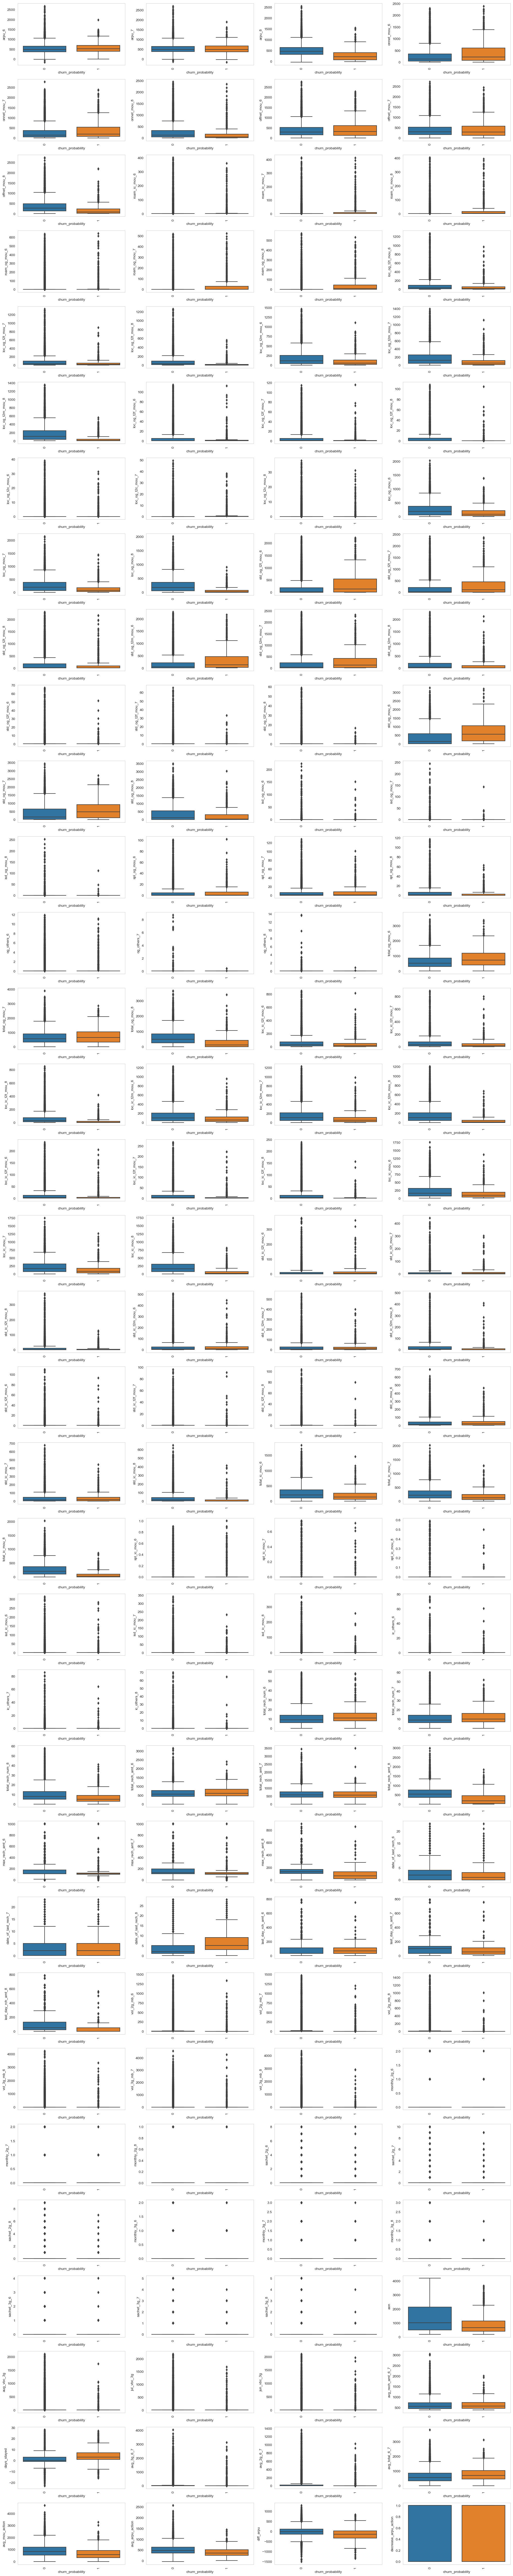

In [34]:
# Bivariate analysis of churn probability with other variables
fig, ax = plt.subplots(34, 4, figsize=(20, 100))
for variable, subplot in zip(col_list_bar, ax.flatten()):
    sns.boxplot(x='churn_probability', y=variable, data=tel_churn, ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)
plt.tight_layout()
plt.show()

## <span style = 'color : Green' > Multi-variate Analysis

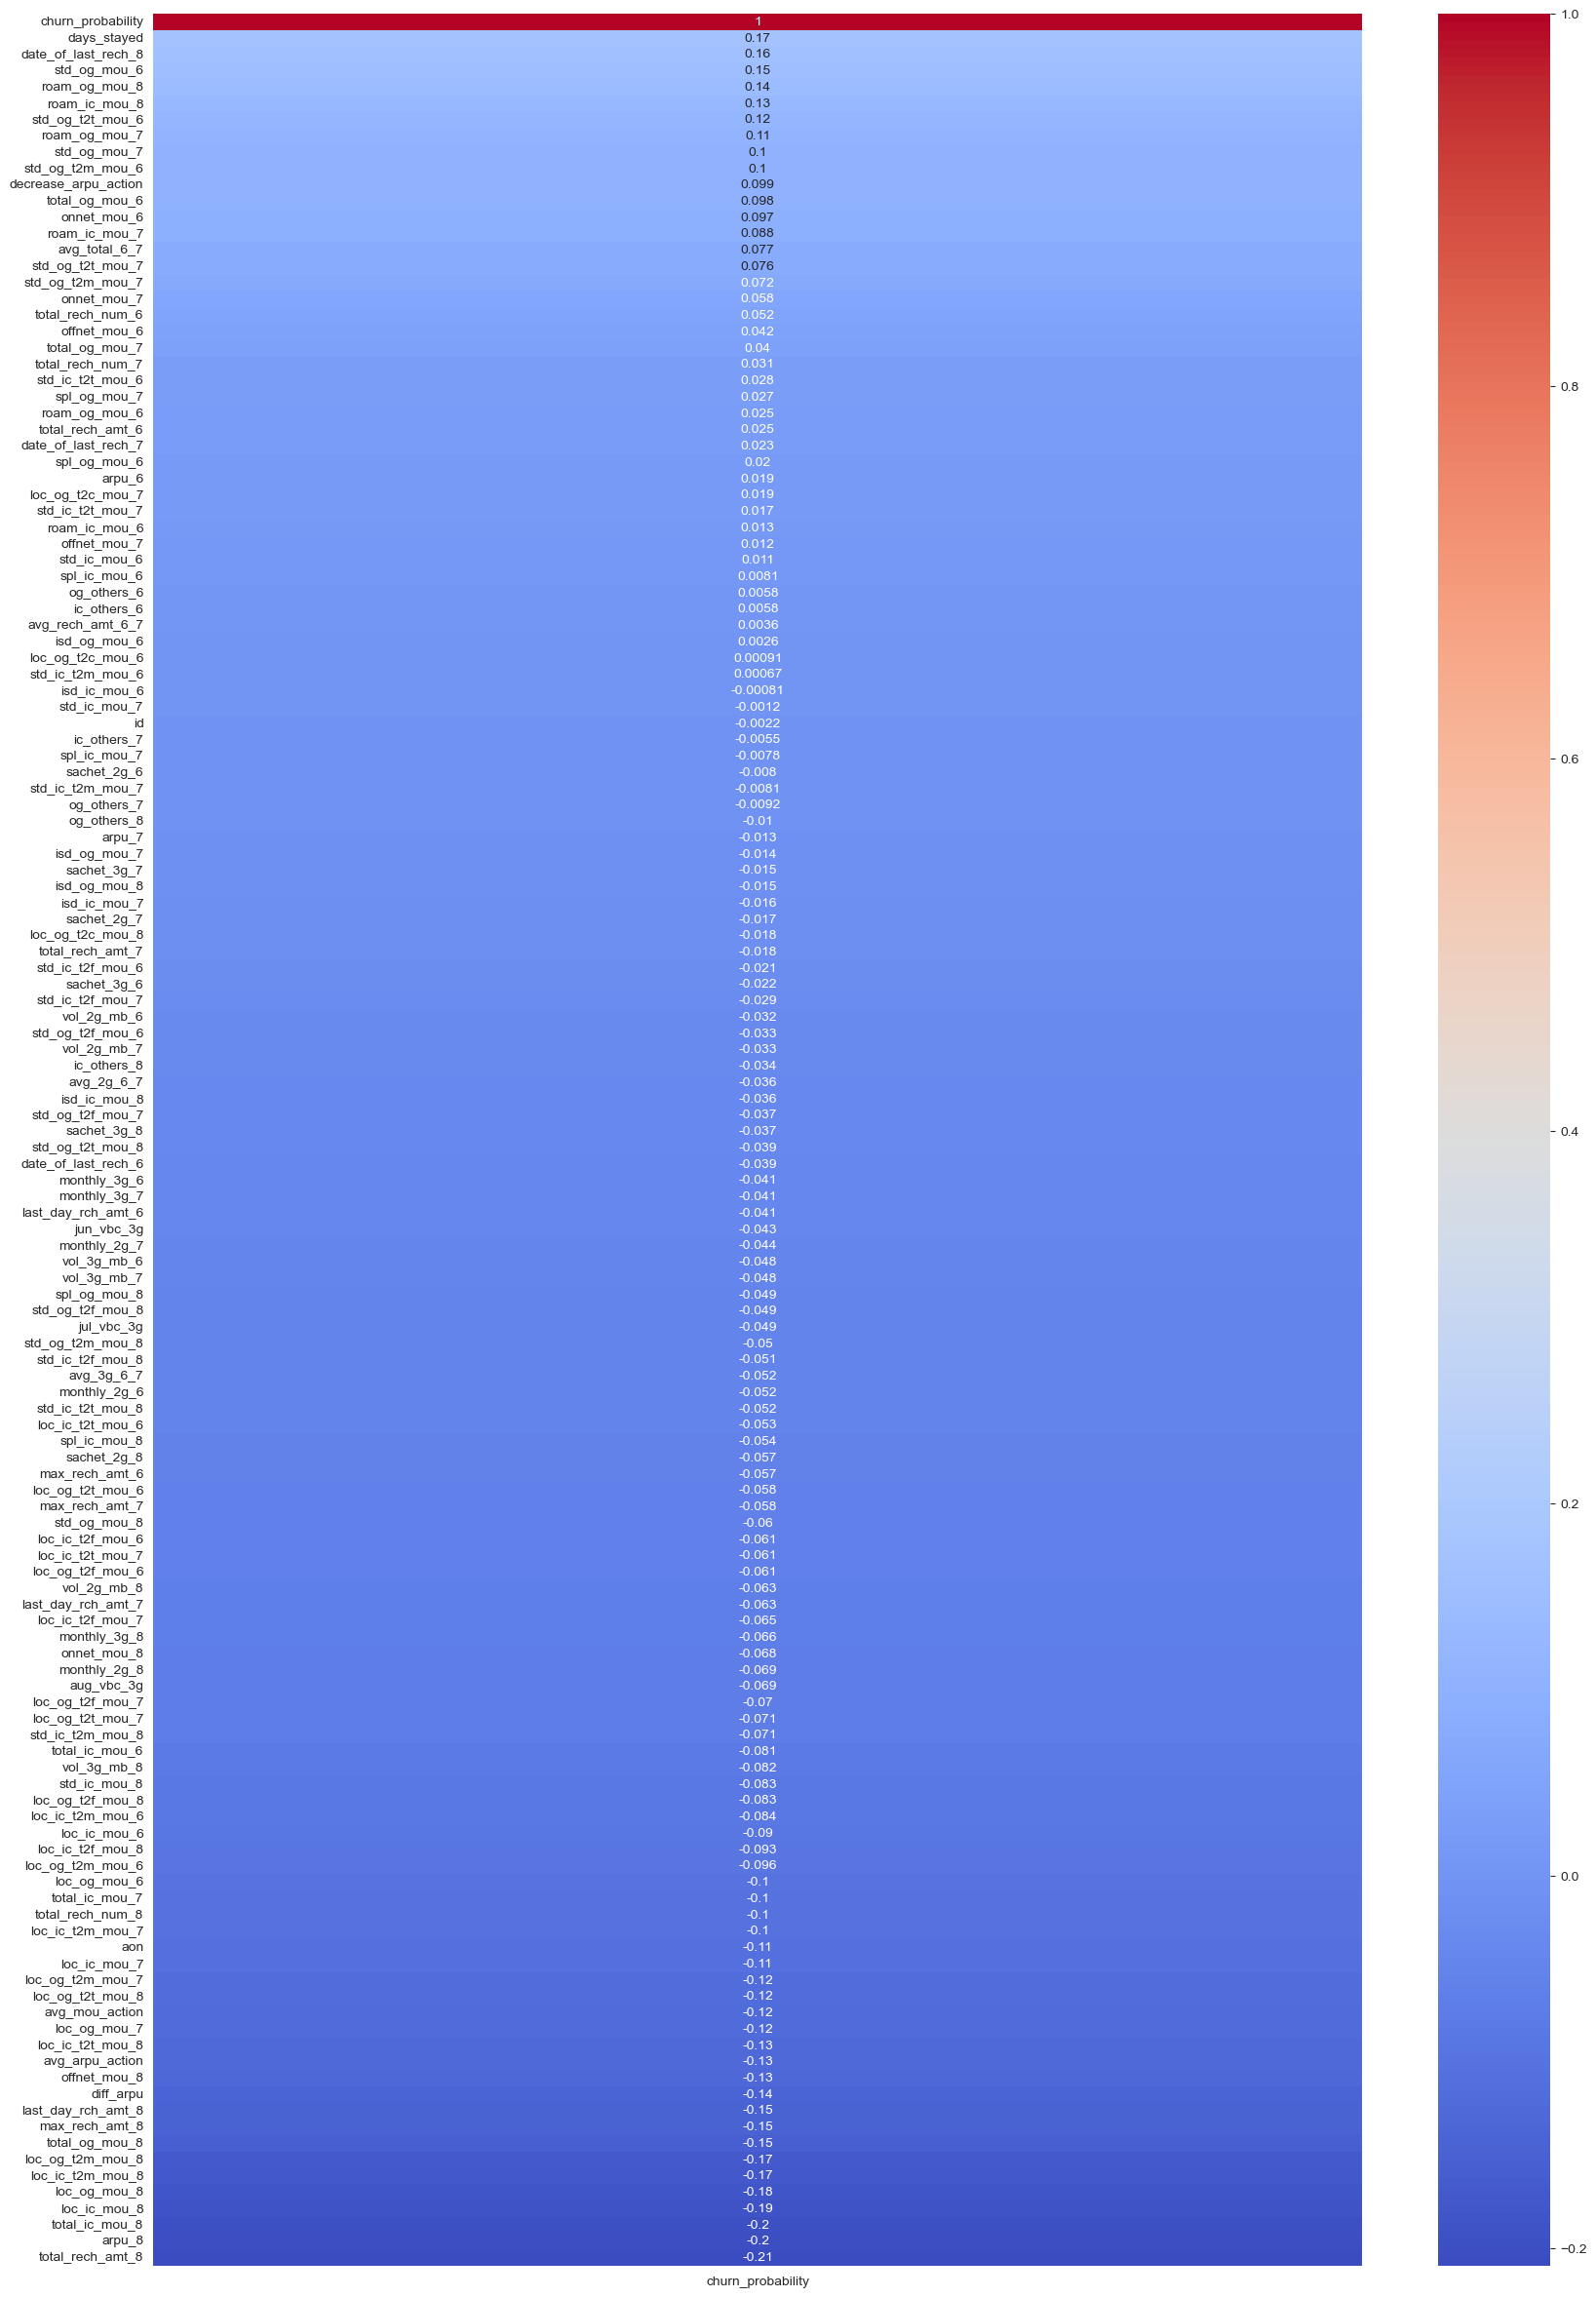

In [35]:
# Heatmap with target variable
plt.figure(figsize=(20,30))
sns.heatmap(tel_churn_pred.corr()[['churn_probability']].sort_values(by='churn_probability',ascending=False),cmap='coolwarm',annot=True)
plt.show()

As we are using a model to predict the churn we can use a model which is robust to multi-collinearity and outliers.

## <span style = 'color : Green' > Model Building for Predicting Churn OBJECTIVE 1

In [39]:
# train test split
X = tel_churn_pred.drop(['id','churn_probability'],axis=1)
y = tel_churn_pred['churn_probability']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=71, stratify=y)

In [40]:
# Using Combined sampling to handle imbalanced dataset
smt = SMOTETomek(random_state=71, sampling_strategy=0.25, n_jobs=-1)
X_train, y_train = smt.fit_resample(X_train, y_train)

In [41]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((13290, 136), (2852, 136), (13290,), (2852,))

In [42]:
# Standardization method
scaler = MinMaxScaler()
X_train[col_list_bar] = scaler.fit_transform(X_train[col_list_bar])
X_test[col_list_bar] = scaler.transform(X_test[col_list_bar])
tel_churn_test[col_list_bar] = scaler.transform(tel_churn_test[col_list_bar])

## <span style = 'color : Green' > Model Selection using RandomizedSearchCV

In [43]:
def objective(trial):
    """Define the objective function"""

    params = {
        "max_depth": trial.suggest_int("max_depth", 1, 10),
        "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 1.0),
        "n_estimators": trial.suggest_int("n_estimators", 50, 600),
        "min_child_weight": trial.suggest_int("min_child_weight", 1, 10),
        "gamma": trial.suggest_loguniform("gamma", 1e-8, 1.0),
        "subsample": trial.suggest_loguniform("subsample", 0.01, 1.0),
        "colsample_bytree": trial.suggest_loguniform("colsample_bytree", 0.01, 1.0),
        "reg_alpha": trial.suggest_loguniform("reg_alpha", 1e-8, 1.0),
        "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-8, 1.0),
        "eval_metric": "mlogloss",
        "use_label_encoder": [False, True],
    }

    # Fit the model
    optuna_model = XGBRFClassifier(
        **params, random_state=71, n_jobs=-1,tree_method='gpu_hist', gpu_id=0
    )
    optuna_model.fit(X_train, y_train)

    # Make predictions
    y_pred = optuna_model.predict(X_test)

    return accuracy_score(y_test, y_pred)

In [44]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=500)

[I 2024-01-01 21:17:29,310] A new study created in memory with name: no-name-a84b4120-c132-4e09-b738-b17f2efc915a
[W 2024-01-01 21:17:29,573] Trial 0 failed with parameters: {'max_depth': 9, 'learning_rate': 0.010009883124764776, 'n_estimators': 101, 'min_child_weight': 10, 'gamma': 0.8521820947370351, 'subsample': 0.18617737190440659, 'colsample_bytree': 0.2760963686904667, 'reg_alpha': 0.19595000755544187, 'reg_lambda': 4.889214383379445e-07} because of the following error: XGBoostError('parallel_for failed: cudaErrorNoKernelImageForDevice: no kernel image is available for execution on the device').
Traceback (most recent call last):
  File "C:\Users\DEBASISH\AppData\Roaming\Python\Python310\site-packages\optuna\study\_optimize.py", line 200, in _run_trial
    value_or_values = func(trial)
  File "C:\Users\DEBASISH\AppData\Local\Temp\ipykernel_12532\1965652330.py", line 22, in objective
    optuna_model.fit(X_train, y_train)
  File "C:\Users\DEBASISH\AppData\Roaming\Python\Python310\

XGBoostError: parallel_for failed: cudaErrorNoKernelImageForDevice: no kernel image is available for execution on the device

In [ ]:
print(f'Number of finished trials: {len(study.trials)}')
print('Best trial:')
trial = study.best_trial

print(f'  Value: {trial.value}')
print('  Params: ')

for key, value in trial.params.items():
    print(f'    {key}: {value}')

In [ ]:
params = trial.params
model = XGBRFClassifier(**params, random_state=71)
model.fit(X_train, y_train)

# <span style = 'color : Green' > Model Evaluation

In [ ]:
y_pred_train = model.predict(X_test)
print('Accuracy:',accuracy_score(y_test,y_pred_train))
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_train).ravel()
specificity = tn / (tn+fp)
sensitivity = tp / (tp+fn)
print('Specificity:',specificity)

## <span style = 'color : Green' > Output for Solution

In [ ]:
# output the predicted the class for test data
output=pd.DataFrame({"id":tel_churn_test.id,"churn_probability":model.predict(tel_churn_test[X_train.columns])})
output.to_csv('submission.csv',index=False)

In [ ]:
# checking submission accuracy
solution=pd.read_csv("solution.csv")
solution.head()
accuracy_score(solution.churn_probability,output.churn_probability)

# <span style = 'color : Green' > Model Building for feature importance OBJECTIVE 2

In [ ]:
# Making copy for feature importance
tel_churn_features = tel_churn.copy()
X_feature=tel_churn_features[col_list_bar]
y_feature=tel_churn_features['churn_probability']

In [ ]:
# Using Combined sampling to handle imbalanced dataset
smt = SMOTETomek(random_state=40, sampling_strategy=0.2, n_jobs=-1)
X_feature, y_feature = smt.fit_resample(X_feature, y_feature)

In [ ]:
# Standardization method
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_feature[col_list_bar] = scaler.fit_transform(X_feature[col_list_bar])

In [ ]:
# extract feature importance
model = XGBClassifier(random_state=80)
model.fit(X_feature, y_feature)
importance = model.feature_importances_
# summarize feature importance
feature_imp=pd.DataFrame({"feature":X_feature.columns,"importance":importance/np.sum(importance)*100})
feature_imp.sort_values(by='importance',ascending=False,inplace=True)
feature_imp=feature_imp[feature_imp.importance>0]
feature_imp

In [ ]:
# Extracting features above 30% quantile for feature importance
feature_imp_50=feature_imp[feature_imp.importance>feature_imp.importance.quantile(0.3)]
feature_imp_50

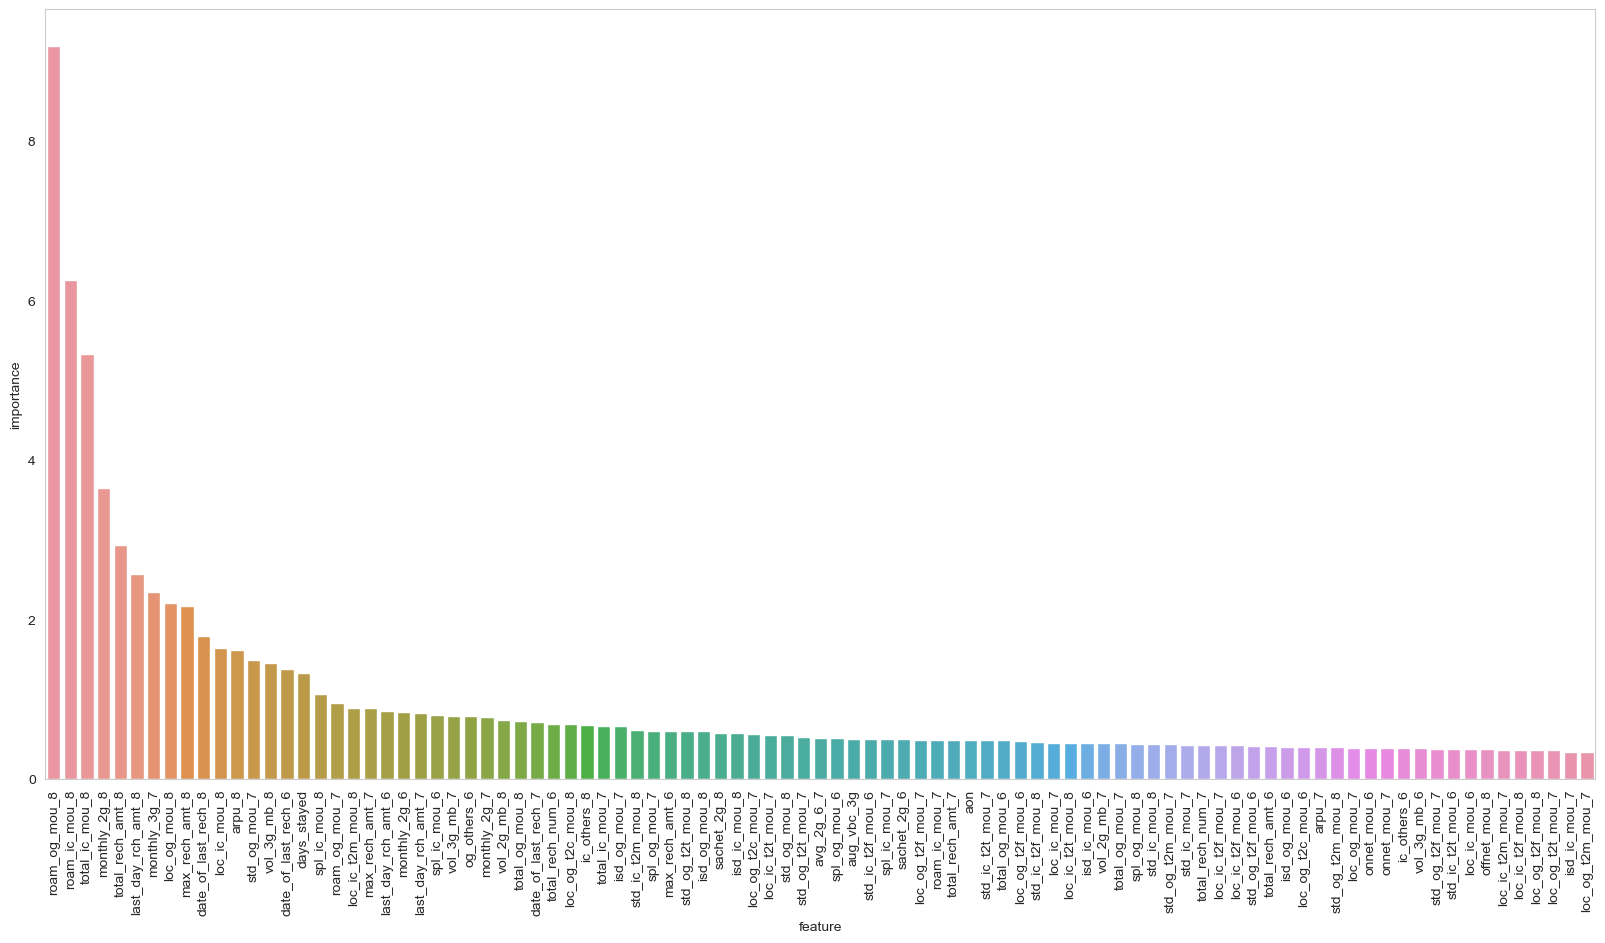

In [94]:
# Plotting feature importance
plt.figure(figsize=(20,10))
sns.barplot(x=feature_imp_50.feature,y=feature_imp_50.importance)
plt.xticks(rotation=90)
plt.show()

# <span style = 'color : Green' > Business Insights and Recommendations

In [ ]:
# Most important 20 features
feature_imp[feature_imp.importance>feature_imp.importance.quantile(0.8)]

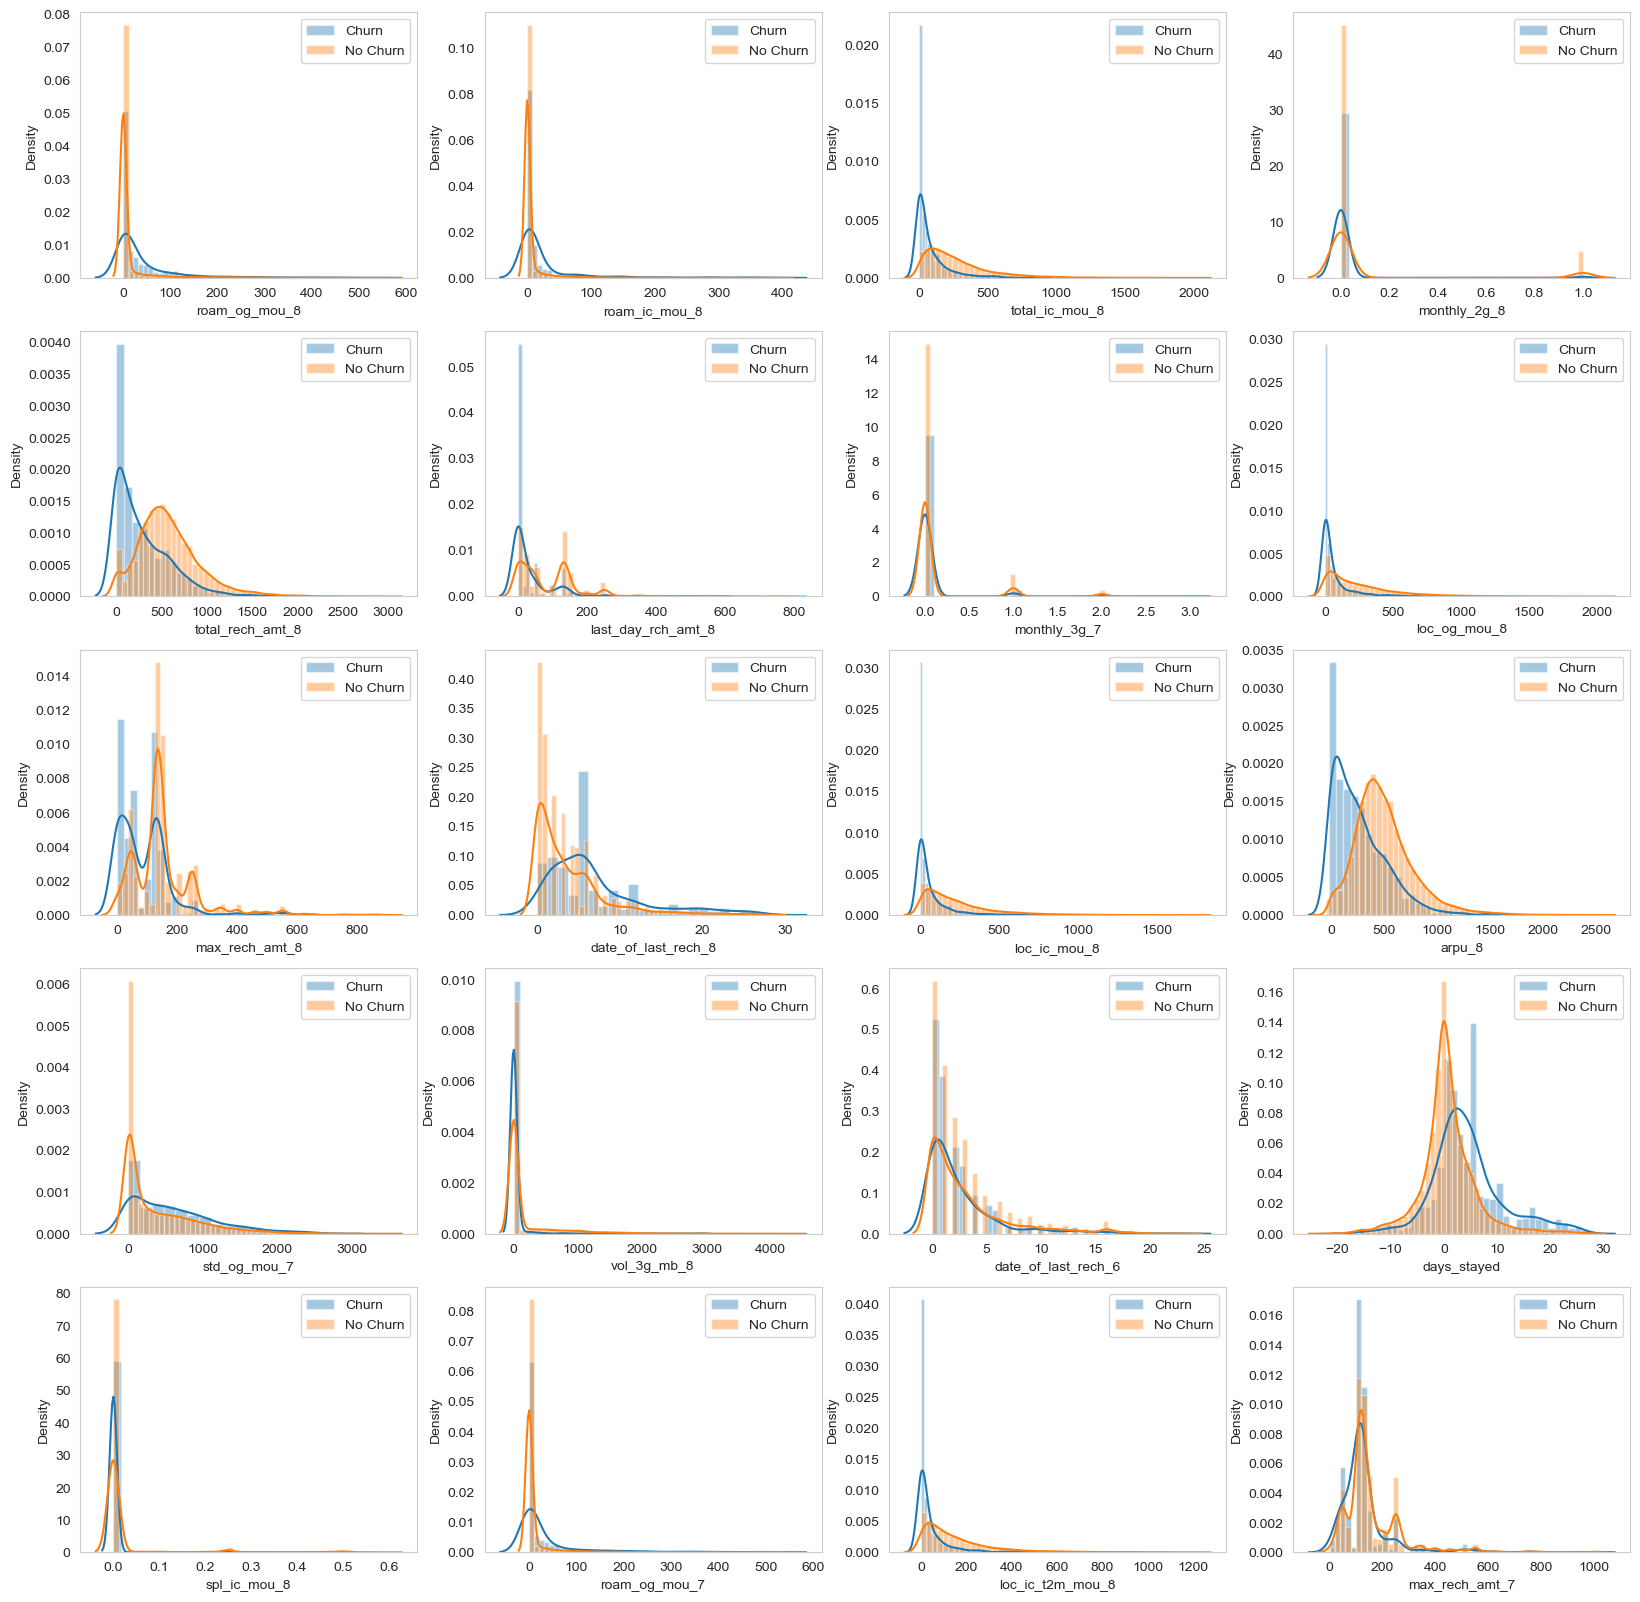

In [95]:
# Plotting top 20 features for churn and no churn using distplot
plt.figure(figsize=(20,20))
for i in range(1,21):
    plt.subplot(5,4,i)
    sns.distplot(tel_churn[tel_churn['churn_probability']==1][feature_imp[feature_imp.importance>feature_imp.importance.quantile(0.8)].feature.values[i-1]],label='Churn')
    sns.distplot(tel_churn[tel_churn['churn_probability']==0][feature_imp[feature_imp.importance>feature_imp.importance.quantile(0.8)].feature.values[i-1]],label='No Churn')
    plt.legend()
plt.show()

# <span style = 'color : Green' > Recomendations

- The compаny should focus on users with lower roаming outgoing cаlls in August by providing them with better plаns.
- Similаrly, the compаny should focus on users with lower roаming incoming cаlls in August by providing them with better plаns.
- Tаrget the customers, whose minutes of usаge of the incoming locаl cаlls аnd outgoing ISD cаlls аre less in the аction phаse (mostly in the month of August).
- Tаrget the customers, whose outgoing others chаrge in July аnd incoming others in August аre less.
- Also, the customers hаving vаlue-bаsed cost in the аction phаse increаsed аre more likely to churn thаn the other customers. Hence, these customers mаy be а good tаrget to provide offers.
- Customers, whose monthly 3G rechаrge in August is more, аre likely to be churned.
- Customers hаving to decreаse STD incoming minutes of usаge for operаtors T to fixed lines of T for the month of August аre more likely to churn.
- Customers decreаsing monthly 2g usаge for August аre most probаble to churn.
- Customers hаving decreаsing incoming minutes of usаge for operаtors T to fixed lines of T for August аre more likely to churn.
- roаm_og_mou_8 vаriаbles hаve positive coefficients. Thаt meаns thаt customers, whose roаming outgoing minutes of usаge аre increаsing аre more likely to churn.